In [2]:
%load_ext autoreload
%autoreload 2

In [58]:
import sys
sys.path.append('/Users/gregruyoga/DataspellProjects/waifu')

In [4]:
from waifu.lightning.source.datamodules import *
from waifu.lightning.source.modules import Generator, Discriminator
import torch.nn as nn
import torch

In [21]:
class CopasGenerator(nn.Module):
    def __init__(self, ngpu):
        super().__init__()
        self.ngpu = ngpu
        nz = 100
        ngf = 64
        nc = 3
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [22]:
cgen = CopasGenerator(1)

In [32]:
z = torch.randn(64, 100, 1, 1)
cgen(z)

tensor([[[[-2.1965e-01,  1.4023e-01,  6.9337e-02,  ...,  1.3371e-01,
           -1.4234e-01,  6.0954e-02],
          [-1.8783e-01, -3.0373e-01, -2.4345e-01,  ..., -3.7525e-01,
           -4.1835e-01,  2.1981e-01],
          [ 1.5186e-01,  6.4816e-01, -4.5853e-02,  ...,  3.5432e-01,
            5.5790e-01,  3.3742e-01],
          ...,
          [ 7.9578e-02,  1.3120e-01, -1.7016e-01,  ..., -3.7434e-01,
           -4.4622e-01, -1.1364e-01],
          [ 1.1657e-01,  5.2149e-01,  7.1432e-02,  ...,  4.0938e-01,
            2.4878e-01, -8.1679e-02],
          [ 6.8082e-03, -2.8729e-01, -1.8059e-01,  ..., -1.6549e-01,
           -4.1340e-01, -1.0592e-01]],

         [[-8.3314e-02,  2.3414e-01,  1.9634e-01,  ...,  1.9654e-02,
           -4.1415e-02,  4.7339e-02],
          [-2.5904e-01, -2.2528e-01, -4.9031e-01,  ..., -1.5486e-02,
            2.9333e-01, -3.2098e-02],
          [-2.5714e-01, -1.0719e-02,  5.5360e-01,  ...,  3.3541e-01,
           -1.0256e-01,  1.5225e-01],
          ...,
     

In [39]:
cgen

CopasGenerator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
 

In [38]:
gen

Generator(
  (net): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): Sigmoid()
  )
)

In [80]:
disc = Discriminator(featuremap_dim=64,
                     input_dim=3,
                     block_activation=nn.ReLU,
                     final_activation=nn.Sigmoid)

In [82]:
gen = Generator(latent_dim=100,
                featuremap_dim=64,
                output_dim=3,
                block_activation=nn.ReLU,
                final_activation=nn.Sigmoid)
z = torch.randn(64, 100, 1, 1)
out = gen(z)

In [87]:
disc(out).view(-1)

tensor([0.4743, 0.4286, 0.5571, 0.5338, 0.4184, 0.5229, 0.5746, 0.4542, 0.5739,
        0.4520, 0.4528, 0.4885, 0.6301, 0.5683, 0.6022, 0.6479, 0.4893, 0.4686,
        0.5645, 0.4781, 0.6294, 0.6071, 0.5127, 0.5564, 0.5112, 0.5521, 0.5197,
        0.5059, 0.5251, 0.5925, 0.5701, 0.7284, 0.4351, 0.4829, 0.5492, 0.5014,
        0.4438, 0.6362, 0.4914, 0.4379, 0.4792, 0.3900, 0.6148, 0.5606, 0.4270,
        0.5248, 0.5647, 0.5530, 0.5979, 0.4091, 0.5534, 0.4685, 0.5853, 0.5625,
        0.5039, 0.4858, 0.3846, 0.6012, 0.7393, 0.4700, 0.5261, 0.5937, 0.4537,
        0.4582], grad_fn=<ViewBackward>)

In [42]:
import torchvision

In [55]:
grid = torchvision.utils.make_grid(out[:1])

In [56]:
grid.shape

torch.Size([3, 64, 64])

In [59]:
from lightning.source.datamodules import WaifuDatamodule

In [66]:
datamodule = WaifuDatamodule()
datamodule.setup()
batch = datamodule.get_batch()

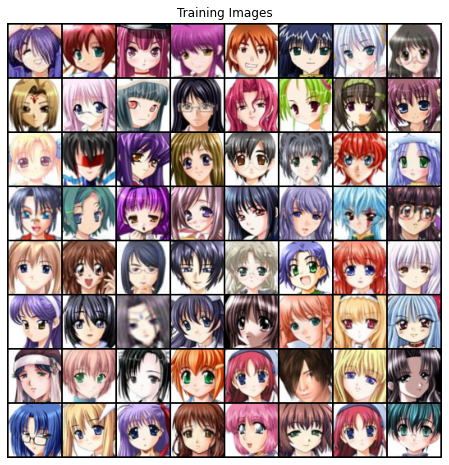

In [70]:
datamodule.preview_batch()

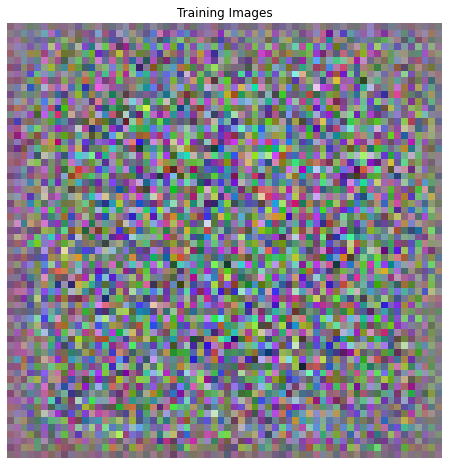

In [75]:
batch = gen(z)
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
image = np.transpose(TorchVisionUtils.make_grid(batch[0].to('cpu')[:64],
                                                padding=2,
                                                normalize=True).cpu(), (1, 2, 0))
plt.imshow(image)

In [76]:
image.shape

torch.Size([64, 64, 3])

In [79]:
plt.show()